In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('cvd_synthetic_dataset_v0.2.csv')

In [3]:
data

,patient_id,gender,age,body_mass_index,smoker,systolic_blood_pressure,hypertension_treated,family_history_of_cardiovascular_disease,atrial_fibrillation,chronic_kidney_disease,rheumatoid_arthritis,diabetes,chronic_obstructive_pulmonary_disorder,forced_expiratory_volume_1,time_to_event_or_censoring,heart_attack_or_stroke_occurred
0,PT00085957,F,54,25.0,0,161.0,0,1,0,0,0,0,0,NaN,10,0
1,PT00093111,M,31,NaN,0,121.0,0,0,0,0,0,0,0,NaN,10,0
2,PT00058456,M,50,31.3,0,130.0,0,0,0,0,0,0,0,91.027306,10,0
3,PT00016352,M,61,30.0,0,165.0,0,0,0,0,0,0,0,NaN,6,1
4,PT00060611,F,67,32.6,0,166.0,0,0,0,0,0,0,0,NaN,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,PT00039436,M,43,29.3,0,126.0,1,0,0,0,0,0,0,96.398808,10,0
99996,PT00023012,M,23,NaN,0,114.0,0,0,0,0,0,0,0,NaN,10,0
99997,PT00004036,F,22,22.8,0,144.0,0,0,0,0,0,0,0,NaN,10,0
99998,PT00096677,F,61,NaN,0,161.0,0,0,0,0,0,0,0,91.087630,10,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   patient_id                                100000 non-null  object 
 1   gender                                    100000 non-null  object 
 2   age                                       100000 non-null  int64  
 3   body_mass_index                           70115 non-null   float64
 4   smoker                                    100000 non-null  int64  
 5   systolic_blood_pressure                   90133 non-null   float64
 6   hypertension_treated                      100000 non-null  int64  
 7   family_history_of_cardiovascular_disease  100000 non-null  int64  
 8   atrial_fibrillation                       100000 non-null  int64  
 9   chronic_kidney_disease                    100000 non-null  int64  
 10  rheumatoid_arthritis 

In [5]:
data.time_to_event_or_censoring.value_counts()

time_to_event_or_censoring
10    93684
1       789
2       744
3       723
7       690
9       689
6       686
4       684
5       661
8       650
Name: count, dtype: int64

(array([1.0000e+01, 2.6100e+02, 2.8430e+03, 1.4109e+04, 2.9797e+04,
        2.8706e+04, 1.1459e+04, 2.6380e+03, 2.9200e+02, 1.8000e+01]),
 array([ 50. ,  66.2,  82.4,  98.6, 114.8, 131. , 147.2, 163.4, 179.6,
        195.8, 212. ]),
 <BarContainer object of 10 artists>)

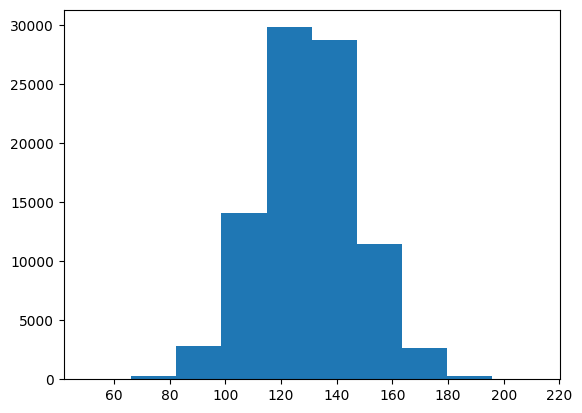

In [6]:
plt.hist(data.systolic_blood_pressure,bins=10)

In [7]:
print(data.smoker.value_counts())
print(data.gender.value_counts())
print(data.hypertension_treated.value_counts())
print(data.family_history_of_cardiovascular_disease.value_counts())
print(data.atrial_fibrillation.value_counts())
print(data.diabetes.value_counts())
print(data.chronic_obstructive_pulmonary_disorder.value_counts())
print(data.heart_attack_or_stroke_occurred.value_counts())

smoker
0    91412
1     8588
Name: count, dtype: int64
gender
M    50503
F    49497
Name: count, dtype: int64
hypertension_treated
0    87538
1    12462
Name: count, dtype: int64
family_history_of_cardiovascular_disease
0    83295
1    16705
Name: count, dtype: int64
atrial_fibrillation
0    98930
1     1070
Name: count, dtype: int64
diabetes
0    90516
1     9484
Name: count, dtype: int64
chronic_obstructive_pulmonary_disorder
0    91865
1     8135
Name: count, dtype: int64
heart_attack_or_stroke_occurred
0    93388
1     6612
Name: count, dtype: int64


In [8]:
data.columns

Index(['patient_id', 'gender', 'age', 'body_mass_index', 'smoker',
       'systolic_blood_pressure', 'hypertension_treated',
       'family_history_of_cardiovascular_disease', 'atrial_fibrillation',
       'chronic_kidney_disease', 'rheumatoid_arthritis', 'diabetes',
       'chronic_obstructive_pulmonary_disorder', 'forced_expiratory_volume_1',
       'time_to_event_or_censoring', 'heart_attack_or_stroke_occurred'],
      dtype='object')

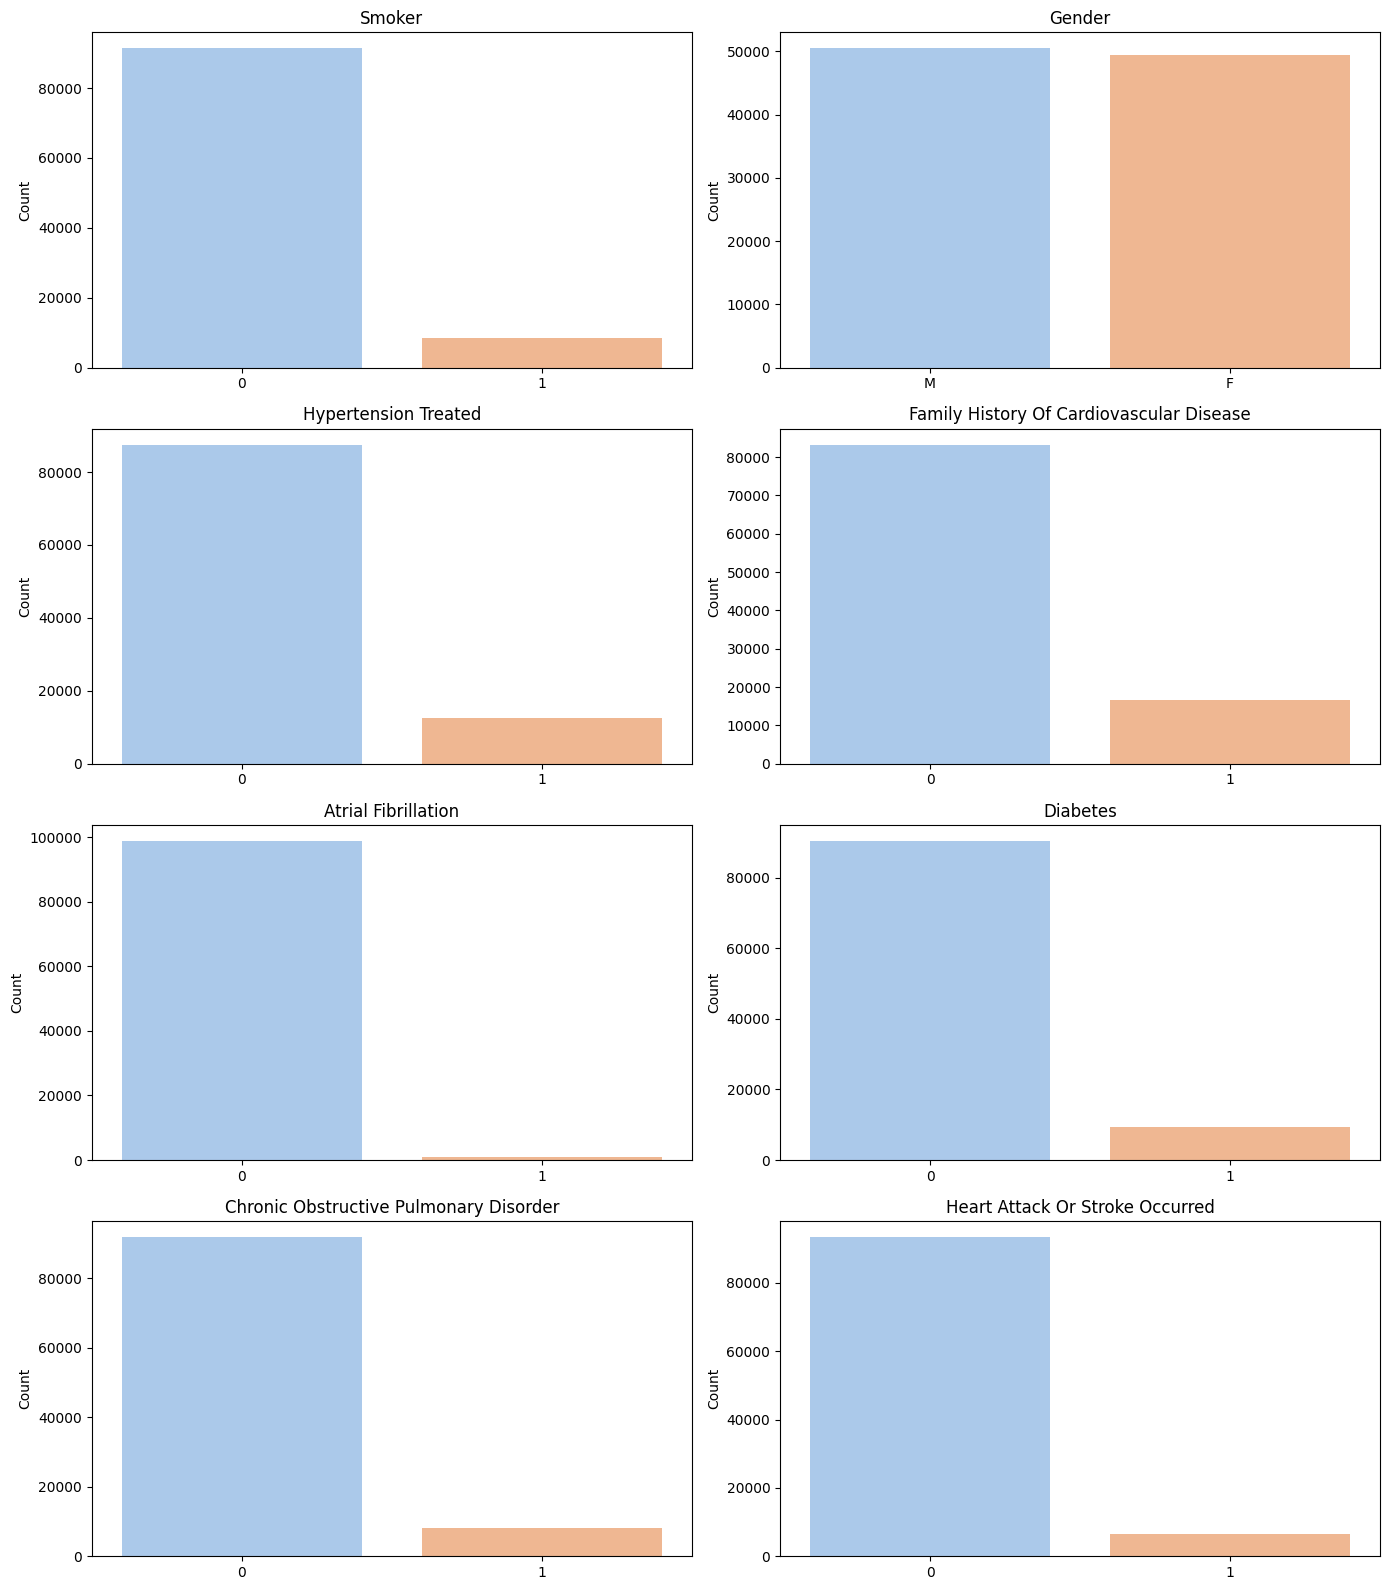

In [9]:
# List of binary features to plot
features = [
    'smoker',
    'gender',
    'hypertension_treated',
    'family_history_of_cardiovascular_disease',
    'atrial_fibrillation',
    'diabetes',
    'chronic_obstructive_pulmonary_disorder',
    'heart_attack_or_stroke_occurred'
]

# Set up subplots: 4 rows x 2 columns
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 16))
axes = axes.flatten()

# Plot each feature
for i, feature in enumerate(features):
    sns.barplot(
        x=data[feature].value_counts().index.astype(str),
        y=data[feature].value_counts().values,
        ax=axes[i],
        palette='pastel'
    
    )
    
    axes[i].set_title(f'{feature.replace("_"," ").title()}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

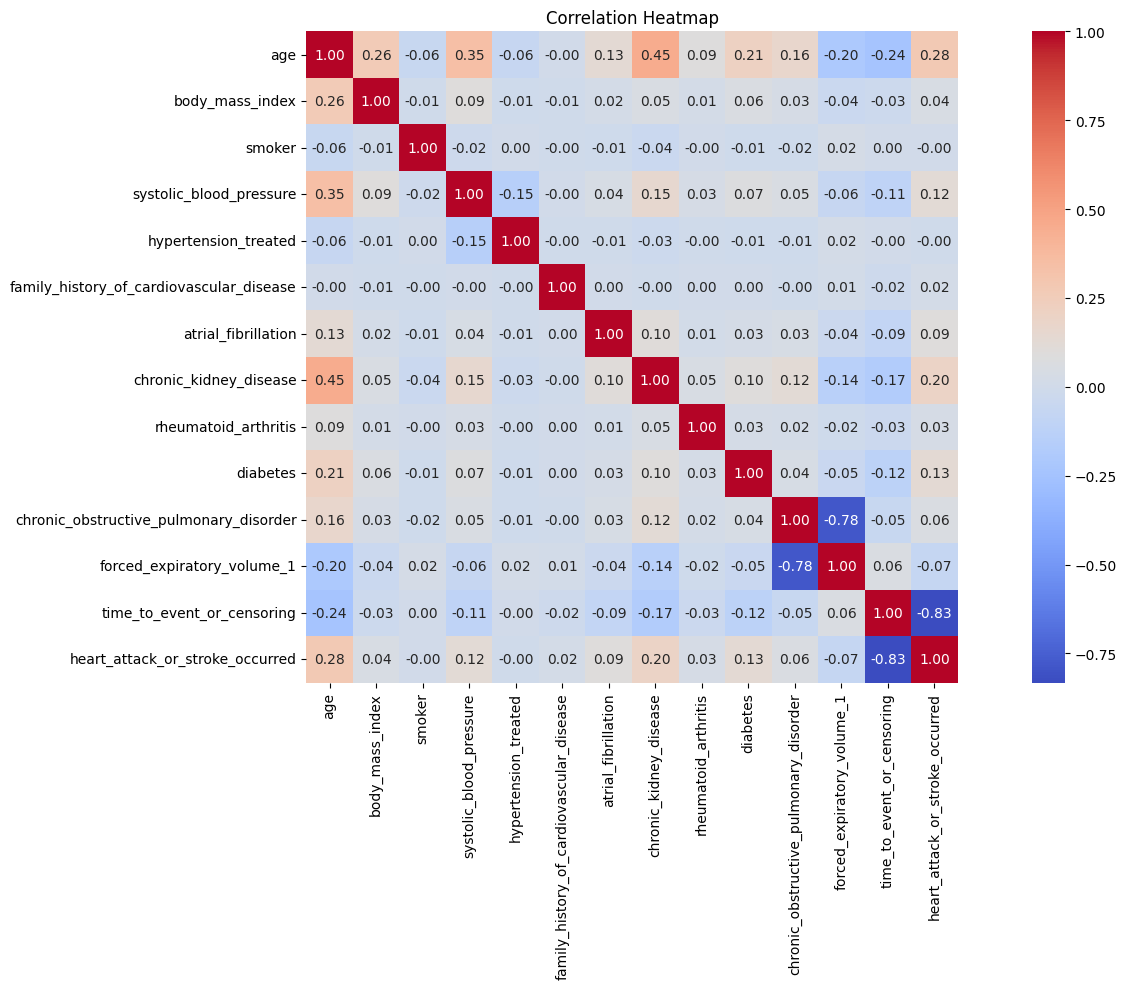

In [10]:
# Heat map
numeric_data = data.select_dtypes(include='number')
corr = numeric_data.corr()

plt.figure(figsize=(16,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

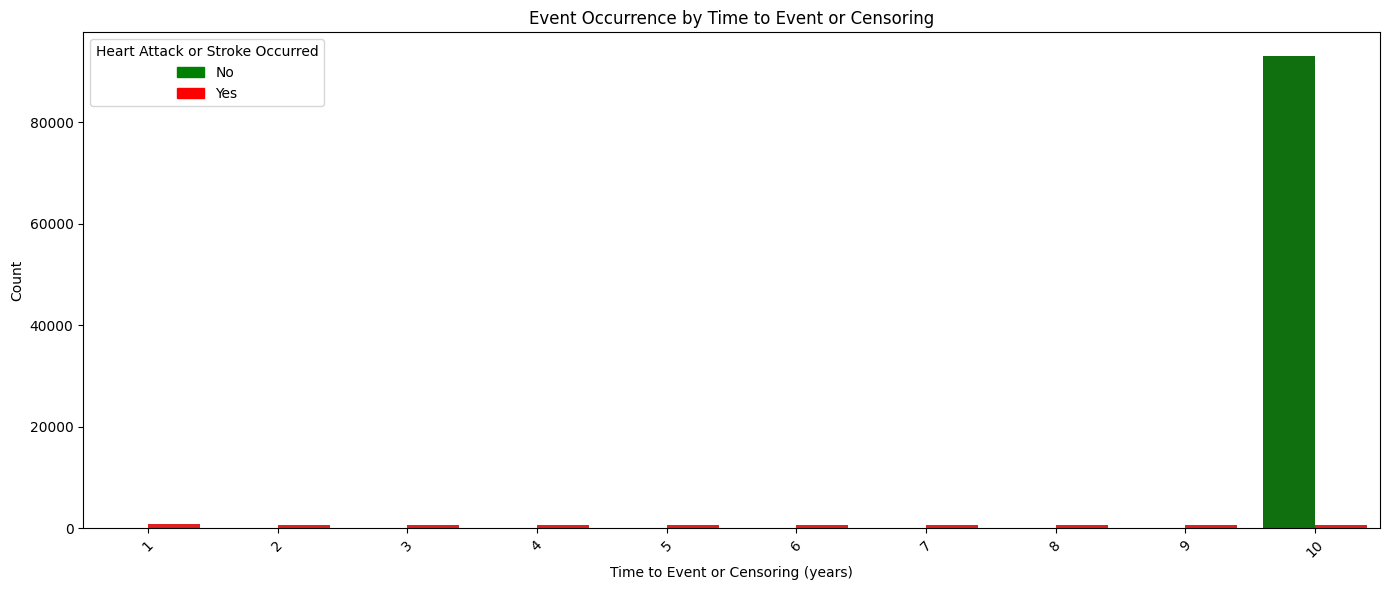

In [11]:
grouped = data.groupby(['time_to_event_or_censoring', 'heart_attack_or_stroke_occurred']).size().reset_index(name='count')
palette = {0: 'green', 1: 'red'}

plt.figure(figsize=(14, 6))
sns.barplot(
    x='time_to_event_or_censoring',
    y='count',
    hue='heart_attack_or_stroke_occurred',
    data=grouped,
    palette=palette
)
plt.title("Event Occurrence by Time to Event or Censoring")
plt.xlabel("Time to Event or Censoring (years)")
plt.ylabel("Count")
plt.xticks(rotation=45)

# Custom legend
legend_handles = [
    mpatches.Patch(color='green', label='No'),
    mpatches.Patch(color='red', label='Yes')
]
plt.legend(handles=legend_handles, title="Heart Attack or Stroke Occurred")

plt.tight_layout()
plt.show()


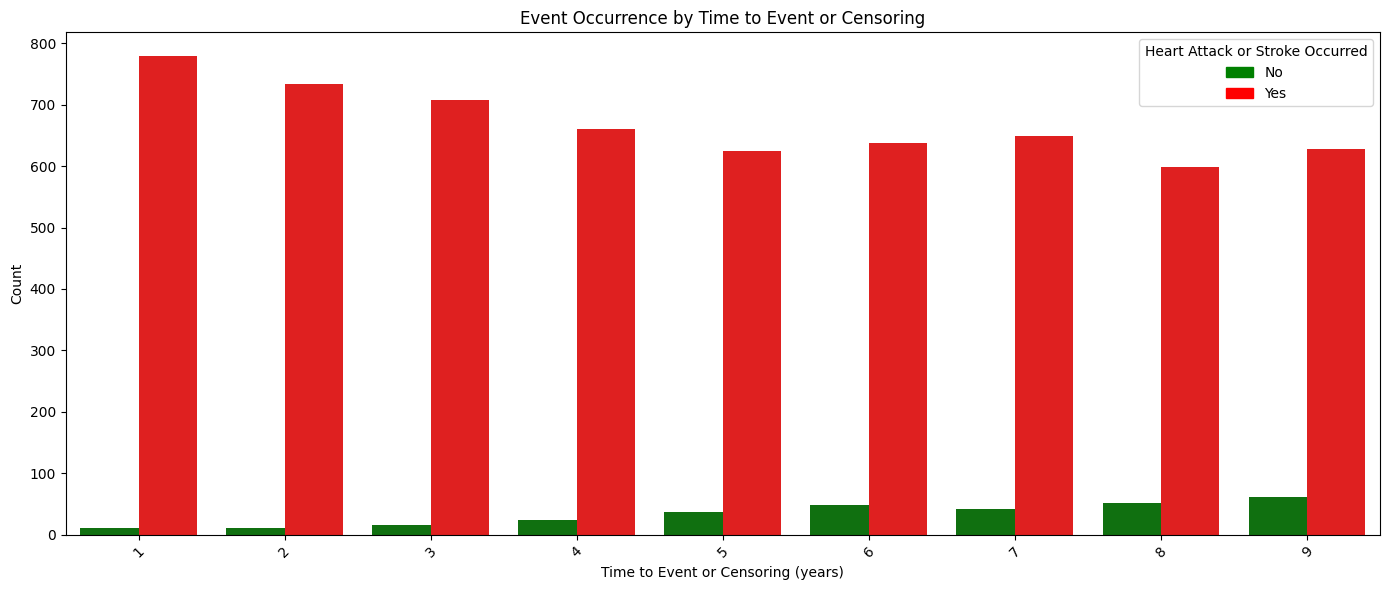

In [12]:
# Filter out rows where time_to_event_or_censoring equals 10
filtered_data = data[data['time_to_event_or_censoring'] != 10]

grouped_f = filtered_data.groupby(['time_to_event_or_censoring', 'heart_attack_or_stroke_occurred']).size().reset_index(name='count')
palette = {0: 'green', 1: 'red'}

plt.figure(figsize=(14, 6))
sns.barplot(
    x='time_to_event_or_censoring',
    y='count',
    hue='heart_attack_or_stroke_occurred',
    data=grouped_f,
    palette=palette
)
plt.title("Event Occurrence by Time to Event or Censoring")
plt.xlabel("Time to Event or Censoring (years)")
plt.ylabel("Count")
plt.xticks(rotation=45)

# Custom legend
legend_handles = [
    mpatches.Patch(color='green', label='No'),
    mpatches.Patch(color='red', label='Yes')
]
plt.legend(handles=legend_handles, title="Heart Attack or Stroke Occurred")

plt.tight_layout()
plt.show()


In [13]:
grouped

,time_to_event_or_censoring,heart_attack_or_stroke_occurred,count
0,1,0,10
1,1,1,779
2,2,0,10
3,2,1,734
4,3,0,16
5,3,1,707
6,4,0,23
7,4,1,661
8,5,0,37
9,5,1,624


In [14]:
# Filter out rows where time_to_event_or_censoring equals 10
filtered_data_1 = data[data['heart_attack_or_stroke_occurred'] == 0 ]
filtered_data_2 = data[data['heart_attack_or_stroke_occurred'] == 1 ]

grouped_1 = filtered_data_1.groupby(['age', 'heart_attack_or_stroke_occurred']).size().reset_index(name='count')
grouped_2 = filtered_data_2.groupby(['age', 'heart_attack_or_stroke_occurred']).size().reset_index(name='count')


In [15]:
grouped_1.head()

,age,heart_attack_or_stroke_occurred,count
0,18,0,603
1,19,0,643
2,20,0,2207
3,21,0,2178
4,22,0,2190


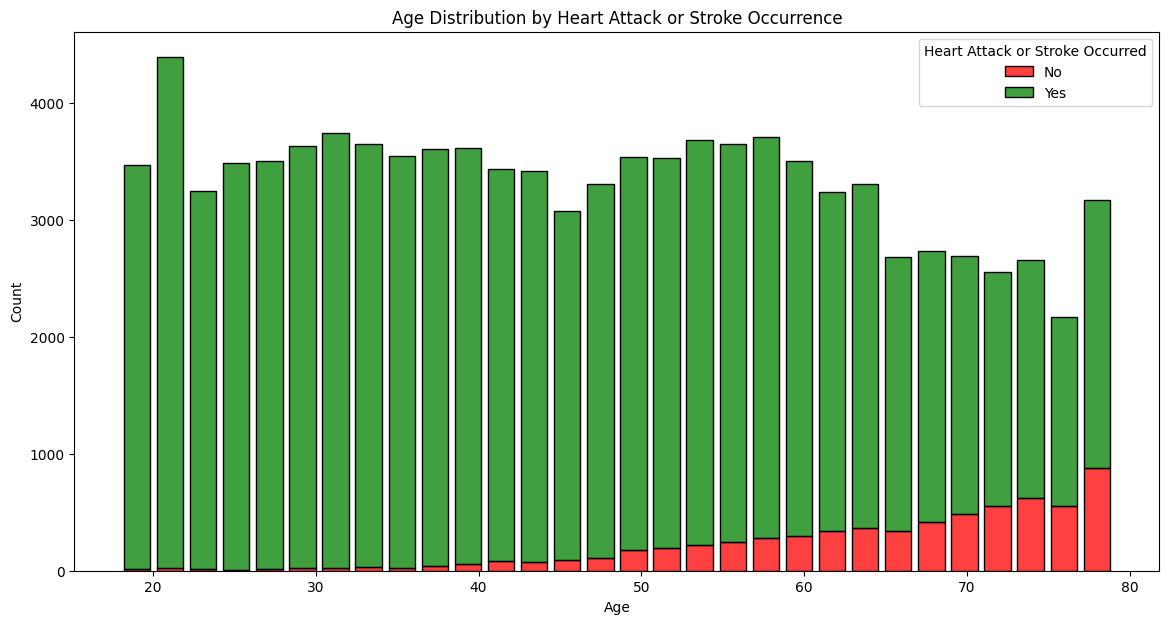

In [16]:
plt.figure(figsize=(14,7))
sns.histplot(
    data=data,
    x='age',
    hue='heart_attack_or_stroke_occurred',
    multiple='stack',  # stacks bars for clearer comparison
    palette={0: 'green', 1: 'red'},
    bins=30,
    shrink=0.8
)
plt.title('Age Distribution by Heart Attack or Stroke Occurrence')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Heart Attack or Stroke Occurred', labels=['No', 'Yes'])
plt.show()


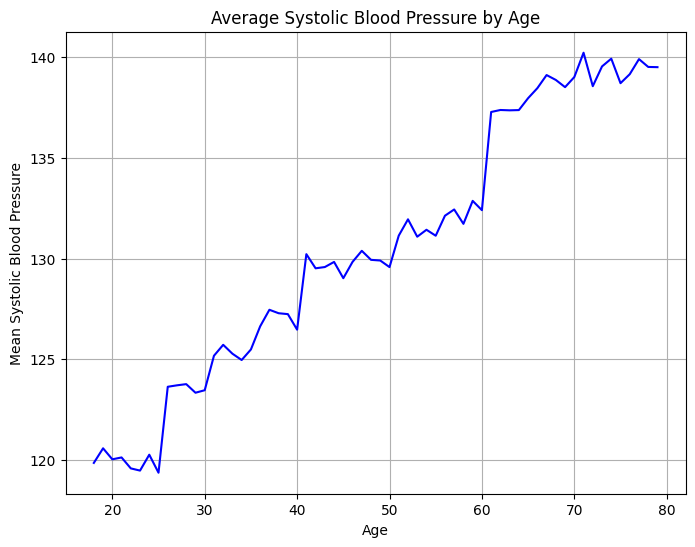

In [17]:
# Group by age and calculate mean systolic blood pressure
age_bp = data.groupby('age')['systolic_blood_pressure'].mean().reset_index()

# Plot
plt.figure(figsize=(8,6))
sns.lineplot(x='age', y='systolic_blood_pressure', data=age_bp, color='blue')
plt.title('Average Systolic Blood Pressure by Age')
plt.xlabel('Age')
plt.ylabel('Mean Systolic Blood Pressure')
plt.grid(True)
plt.show()


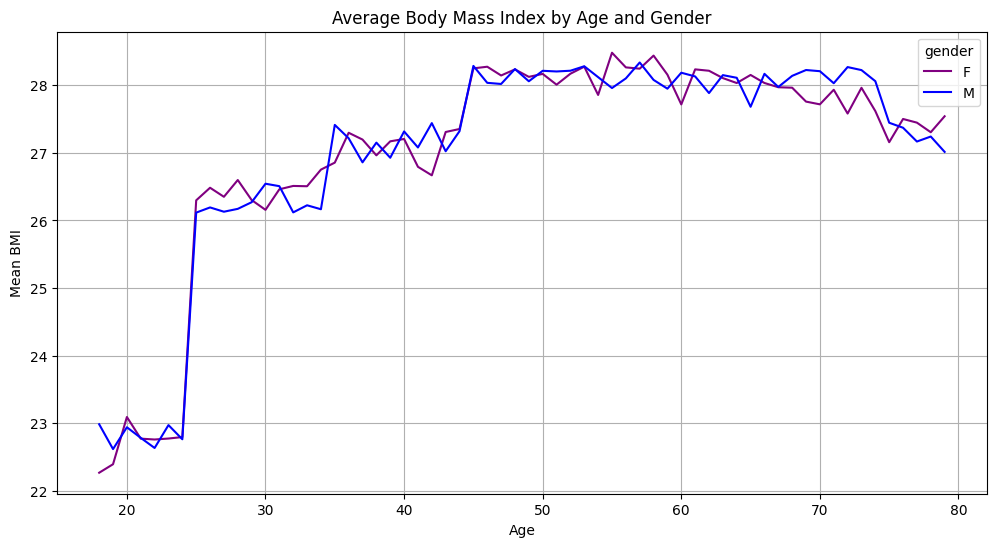

In [19]:
# Group by age and gender, calculate mean BMI
grouped = data.groupby(['age', 'gender'])['body_mass_index'].mean().reset_index()

# Line plot
plt.figure(figsize=(12,6))
sns.lineplot(data=grouped, x='age', y='body_mass_index', hue='gender', palette={'M': 'blue', 'F': 'purple'})
plt.title('Average Body Mass Index by Age and Gender')
plt.xlabel('Age')
plt.ylabel('Mean BMI')
plt.grid(True)
plt.show()

##### KNN Imputer — uses nearby records based on systolic_blood_pressure and other features.

In [45]:
# Copy relevant features
features = ['age','systolic_blood_pressure','hypertension_treated','chronic_kidney_disease', 'time_to_event_or_censoring', 'heart_attack_or_stroke_occurred']
data_knn = data[features].copy()

# Encode categorical variable (gender)
#data_knn['gender'] = LabelEncoder().fit_transform(data_knn['gender'])

# Apply KNN Imputer
imputer = KNNImputer(n_neighbors=15)
data_imputed = imputer.fit_transform(data_knn)


In [46]:
data_imputed

array([[ 54., 161.,   0.,   0.,  10.,   0.],
       [ 31., 121.,   0.,   0.,  10.,   0.],
       [ 50., 130.,   0.,   0.,  10.,   0.],
       ...,
       [ 22., 144.,   0.,   0.,  10.,   0.],
       [ 61., 161.,   0.,   0.,  10.,   0.],
       [ 43., 158.,   0.,   0.,  10.,   0.]])

In [47]:
data_1 = data.copy()

In [48]:
data_1[features] = data_imputed

In [49]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   patient_id                                100000 non-null  object 
 1   gender                                    100000 non-null  object 
 2   age                                       100000 non-null  float64
 3   body_mass_index                           70115 non-null   float64
 4   smoker                                    100000 non-null  int64  
 5   systolic_blood_pressure                   100000 non-null  float64
 6   hypertension_treated                      100000 non-null  float64
 7   family_history_of_cardiovascular_disease  100000 non-null  int64  
 8   atrial_fibrillation                       100000 non-null  int64  
 9   chronic_kidney_disease                    100000 non-null  float64
 10  rheumatoid_arthritis 

In [50]:

print(data_1.systolic_blood_pressure.mean())

129.908366


In [51]:

print(data.systolic_blood_pressure.mean())

129.91627927618075


In [57]:

print(data_4.systolic_blood_pressure.mean())

129.90527028276733


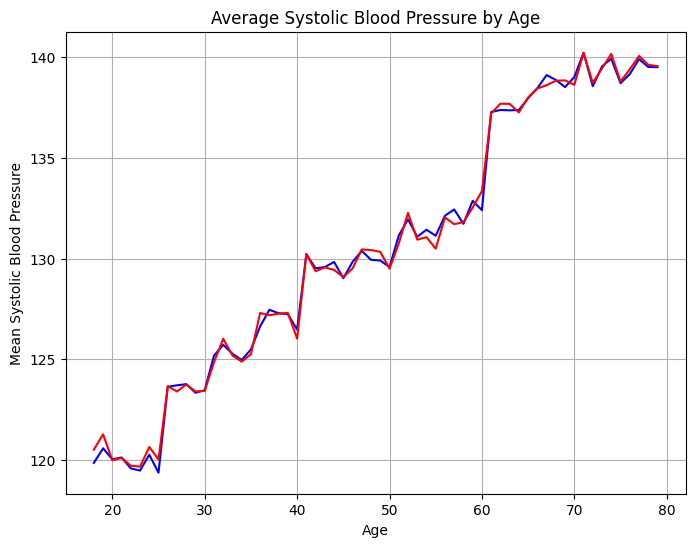

In [52]:
# Group by age and calculate mean systolic blood pressure
age_bp = data.groupby('age')['systolic_blood_pressure'].mean().reset_index()
age_bp_1 = data_1.groupby('age')['systolic_blood_pressure'].mean().reset_index()

# Plot
plt.figure(figsize=(8,6))
sns.lineplot(x='age', y='systolic_blood_pressure', data=age_bp, color='blue')
sns.lineplot(x='age', y='systolic_blood_pressure', data=age_bp_1, color='red')
plt.title('Average Systolic Blood Pressure by Age')
plt.xlabel('Age')
plt.ylabel('Mean Systolic Blood Pressure')
plt.grid(True)
plt.show()


In [53]:
data_4 = data.copy()

In [54]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Separate known and missing BMI
known_bmi = data_4[data_4['systolic_blood_pressure'].notna()]
missing_bmi = data_4[data_4['systolic_blood_pressure'].isna()]

# Fit linear model (BMI ~ age)
model = LinearRegression()
model.fit(known_bmi[['age']], known_bmi['systolic_blood_pressure'])

# Predict missing BMI
predicted_bmi = model.predict(missing_bmi[['age']])

# Fill in predicted values
data_4.loc[data_4['systolic_blood_pressure'].isna(), 'systolic_blood_pressure'] = predicted_bmi


In [58]:
data_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   patient_id                                100000 non-null  object 
 1   gender                                    100000 non-null  object 
 2   age                                       100000 non-null  int64  
 3   body_mass_index                           70115 non-null   float64
 4   smoker                                    100000 non-null  int64  
 5   systolic_blood_pressure                   100000 non-null  float64
 6   hypertension_treated                      100000 non-null  int64  
 7   family_history_of_cardiovascular_disease  100000 non-null  int64  
 8   atrial_fibrillation                       100000 non-null  int64  
 9   chronic_kidney_disease                    100000 non-null  int64  
 10  rheumatoid_arthritis 

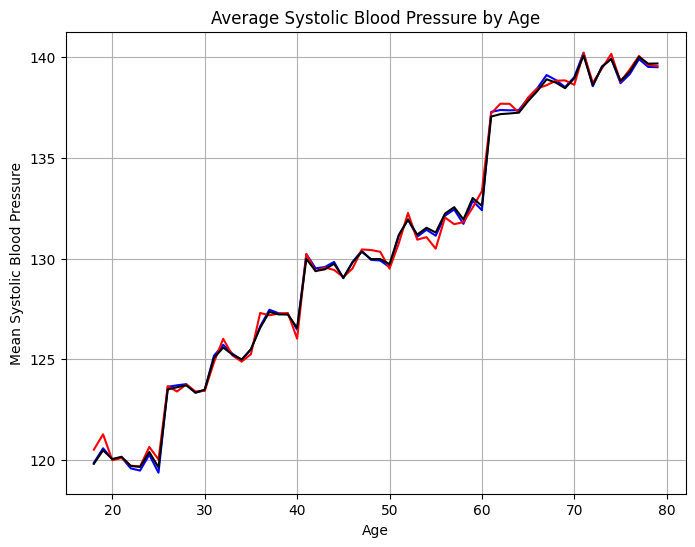

In [56]:
# Group by age and calculate mean systolic blood pressure with gender
age_bp = data.groupby('age')['systolic_blood_pressure'].mean().reset_index()
age_bp_1 = data_1.groupby('age')['systolic_blood_pressure'].mean().reset_index()
age_bp_4 = data_4.groupby('age')['systolic_blood_pressure'].mean().reset_index()

# Plot
plt.figure(figsize=(8,6))
sns.lineplot(x='age', y='systolic_blood_pressure', data=age_bp, color='blue')
sns.lineplot(x='age', y='systolic_blood_pressure', data=age_bp_1, color='red')
sns.lineplot(x='age', y='systolic_blood_pressure', data=age_bp_4, color='black')

plt.title('Average Systolic Blood Pressure by Age')
plt.xlabel('Age')
plt.ylabel('Mean Systolic Blood Pressure')
plt.grid(True)
plt.show()


##### Regression Imputation (BMI predicted by age)

In [59]:
data_3 = data.copy()

In [60]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Separate known and missing BMI
known_bmi = data_3[data_3['body_mass_index'].notna()]
missing_bmi = data_3[data_3['body_mass_index'].isna()]

# Fit linear model (BMI ~ age)
model = LinearRegression()
model.fit(known_bmi[['age']], known_bmi['body_mass_index'])

# Predict missing BMI
predicted_bmi = model.predict(missing_bmi[['age']])

# Fill in predicted values
data_3.loc[data_3['body_mass_index'].isna(), 'body_mass_index'] = predicted_bmi


In [61]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   patient_id                                100000 non-null  object 
 1   gender                                    100000 non-null  object 
 2   age                                       100000 non-null  int64  
 3   body_mass_index                           100000 non-null  float64
 4   smoker                                    100000 non-null  int64  
 5   systolic_blood_pressure                   90133 non-null   float64
 6   hypertension_treated                      100000 non-null  int64  
 7   family_history_of_cardiovascular_disease  100000 non-null  int64  
 8   atrial_fibrillation                       100000 non-null  int64  
 9   chronic_kidney_disease                    100000 non-null  int64  
 10  rheumatoid_arthritis 

In [62]:
# Copy relevant features
features = ['age', 'systolic_blood_pressure','gender','body_mass_index','hypertension_treated','chronic_kidney_disease','time_to_event_or_censoring', 'heart_attack_or_stroke_occurred','systolic_blood_pressure']
data_knn = data_1[features].copy()

# Encode categorical variable (gender)
data_knn['gender'] = LabelEncoder().fit_transform(data_knn['gender'])

# Apply KNN Imputer
imputer = KNNImputer(n_neighbors=5)
data_imputed = imputer.fit_transform(data_knn)

In [63]:
data_2= data_1.copy()

In [64]:
data_2[features] = data_imputed

In [65]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   patient_id                                100000 non-null  object 
 1   gender                                    100000 non-null  float64
 2   age                                       100000 non-null  float64
 3   body_mass_index                           100000 non-null  float64
 4   smoker                                    100000 non-null  int64  
 5   systolic_blood_pressure                   100000 non-null  float64
 6   hypertension_treated                      100000 non-null  float64
 7   family_history_of_cardiovascular_disease  100000 non-null  int64  
 8   atrial_fibrillation                       100000 non-null  int64  
 9   chronic_kidney_disease                    100000 non-null  float64
 10  rheumatoid_arthritis 

In [66]:

print(data.body_mass_index.mean())

26.980034229480136


In [67]:

print(data_2.body_mass_index.mean())

26.9778248


In [70]:
print(data_3.body_mass_index.mean())

26.980992725717236


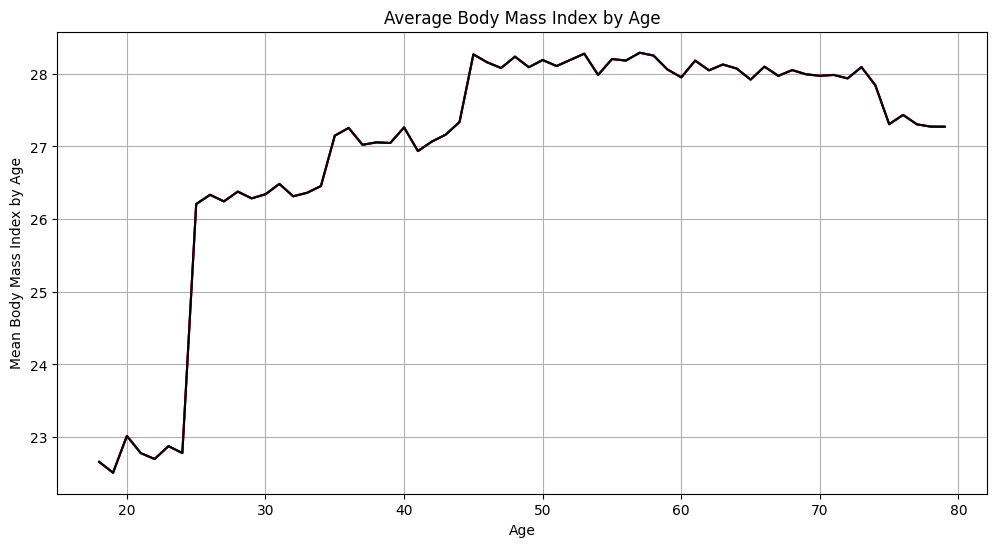

In [68]:
# Group by age and calculate mean systolic blood pressure
age_bmi = data.groupby('age')['body_mass_index'].mean().reset_index()
age_bmi_1 = data_1.groupby('age')['body_mass_index'].mean().reset_index()
# Filter out rows where time_to_event_or_censoring equals 10
filtered_data = data[pd.notnull(data['body_mass_index'])]
age_bmi_ori = filtered_data.groupby('age')['body_mass_index'].mean().reset_index()
# Plot
plt.figure(figsize=(12,6))
sns.lineplot(x='age', y='body_mass_index', data=age_bmi, color='blue')
sns.lineplot(x='age', y='body_mass_index', data=age_bmi_1, color='red')
sns.lineplot(x='age', y='body_mass_index', data=age_bmi_ori, color='black')

plt.title('Average Body Mass Index by Age')
plt.xlabel('Age')
plt.ylabel('Mean Body Mass Index by Age')
plt.grid(True)
plt.show()


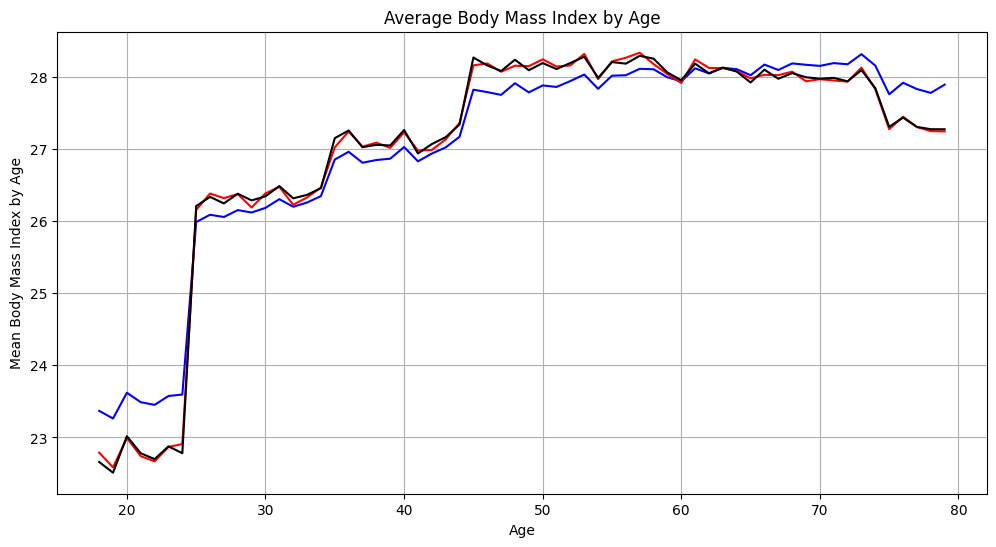

In [69]:
# Group by age and calculate mean systolic blood pressure
age_bmi = data_3.groupby('age')['body_mass_index'].mean().reset_index()
age_bmi_1 = data_2.groupby('age')['body_mass_index'].mean().reset_index()
# Filter out rows where time_to_event_or_cens+oring equals 10
filtered_data = data[pd.notnull(data['body_mass_index'])]
age_bmi_ori = filtered_data.groupby('age')['body_mass_index'].mean().reset_index()
# Plot
plt.figure(figsize=(12,6))
sns.lineplot(x='age', y='body_mass_index', data=age_bmi, color='blue')
sns.lineplot(x='age', y='body_mass_index', data=age_bmi_1, color='red')
sns.lineplot(x='age', y='body_mass_index', data=age_bmi_ori, color='black')

plt.title('Average Body Mass Index by Age')
plt.xlabel('Age')
plt.ylabel('Mean Body Mass Index by Age')
plt.grid(True)
plt.show()


In [74]:
df_copy = data_2.drop(columns=['forced_expiratory_volume_1','patient_id'])

In [75]:
df_copy.to_csv('final_df.csv', index=False)